### Brain Tumor MRI Dataset

This dataset is a combination of the following three datasets :
figshare
SARTAJ dataset
Br35H
The dataset with the data is here: https://www.kaggle.com/masoudnickparvar/brain-tumor-mri-dataset

This dataset contains 7022 images of human brain MRI images which are classified into 4 classes: glioma - meningioma - no tumor and pituitary.

Goal:  Predict type of brain tumor on brain MRI, by using Convolution Neural Network. 

### Import Libraries and Load Data

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.activations import relu,softmax

In [2]:
train_path = 'C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training'
labels = os.listdir(train_path)
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


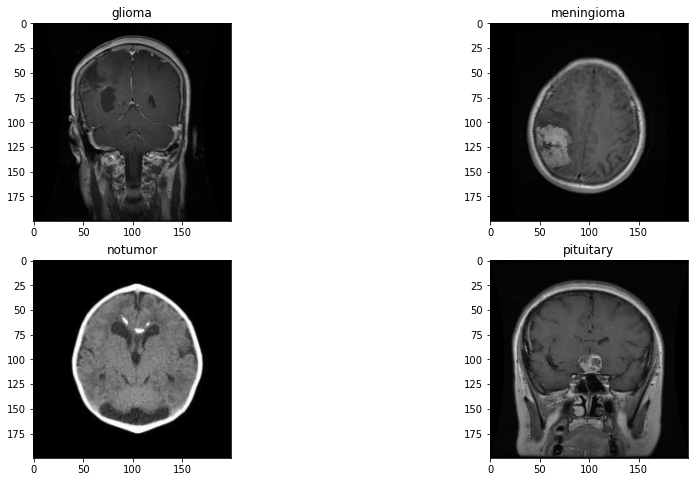

In [3]:
plt.figure(figsize=(15,8))

categorical_images = ['C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training/glioma/Tr-gl_0010.jpg', 
                      'C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training/meningioma/Tr-me_0010.jpg', 
                      'C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training/notumor/Tr-no_0010.jpg', 
                      'C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training/pituitary/Tr-pi_0010.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    img = cv2.imread(categorical_images[i])
    img = cv2.resize(img, (200, 200))
    plt.imshow(img)
    plt.title(labels[i])

## Image Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range = 0.4,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4,
                                    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train = train_datagen.flow_from_directory('C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Training',
                                          target_size=(200,200),
                                          class_mode='categorical',
                                          batch_size=32)
test=test_datagen.flow_from_directory('C:/Users/T/Documents/AIyapayzeka/Kaggle/BrainTumorDetectionCNN/Testing',
                                      target_size=(200,200),
                                      class_mode='categorical',
                                      batch_size=32)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## Convolutional Neural Network

In [7]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation=('relu'),input_shape=(200,200,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),activation=('relu'))) 
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3),activation=('relu')))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(4,activation=('softmax')))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics= ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)      

In [10]:
model.fit(train, epochs=10, validation_data=test,verbose=1)

Epoch 1/10
179/179 [==============================] - 393s 2s/step - loss: 1.0766 - accuracy: 0.4996 - val_loss: 1.0316 - val_accuracy: 0.5820
Epoch 2/10
179/179 [==============================] - 400s 2s/step - loss: 0.8828 - accuracy: 0.6322 - val_loss: 1.0677 - val_accuracy: 0.5446
Epoch 3/10
179/179 [==============================] - 397s 2s/step - loss: 0.7926 - accuracy: 0.6787 - val_loss: 0.8063 - val_accuracy: 0.6629
Epoch 4/10
179/179 [==============================] - 402s 2s/step - loss: 0.7659 - accuracy: 0.6889 - val_loss: 0.9897 - val_accuracy: 0.6415
Epoch 5/10
179/179 [==============================] - 401s 2s/step - loss: 0.7184 - accuracy: 0.7118 - val_loss: 0.9958 - val_accuracy: 0.6087
Epoch 6/10
179/179 [==============================] - 402s 2s/step - loss: 0.7023 - accuracy: 0.7108 - val_loss: 0.8836 - val_accuracy: 0.6575
Epoch 7/10
179/179 [==============================] - 388s 2s/step - loss: 0.6602 - accuracy: 0.7409 - val_loss: 1.1618 - val_accuracy: 0.5957

In [11]:
score = model.evaluate(test)

41/41 [==============================] - 22s 540ms/step - loss: 0.7194 - accuracy: 0.7185
